In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [35]:
day_3 = pd.read_csv(r"C:\Utrecht University\prices_round_4_day_3.csv", sep = ";")
day_1 = pd.read_csv(r"C:\Utrecht University\prices_round_4_day_1.csv", sep = ";")
day_2 = pd.read_csv(r"C:\Utrecht University\prices_round_4_day_2.csv", sep = ";")
day_3.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,3,0,PICNIC_BASKET,73997.0,2.0,73996.0,14.0,73994.0,30.0,74008.0,2.0,74009.0,14.0,74010.0,30.0,74002.5,0.0
1,3,0,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3094.0,0.0
2,3,0,BERRIES,3905.0,14.0,3904.0,52.0,NaN,NaN,3912.0,14.0,3913.0,52.0,NaN,NaN,3908.5,0.0
3,3,0,BAGUETTE,12381.0,47.0,12380.0,56.0,NaN,NaN,12383.0,103.0,NaN,NaN,NaN,NaN,12382.0,0.0
4,3,0,PEARLS,9996.0,2.0,9995.0,25.0,NaN,NaN,10004.0,2.0,10005.0,25.0,NaN,NaN,10000.0,0.0


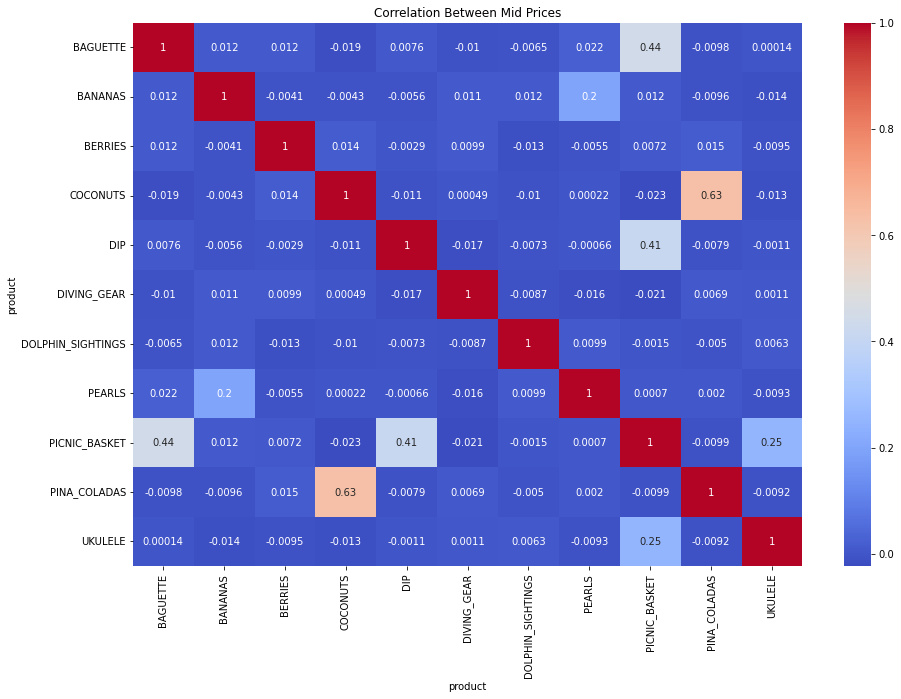

In [49]:
df = day_3

# Pivot the data to get a separate column for each product's mid price
df_pivoted = df.pivot(index='timestamp', columns='product', values='mid_price')
df_pivoted_change = df_pivoted.pct_change().dropna()

# Calculate the correlation matrix between products
corr_matrix = df_pivoted_change.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Between Mid Prices')

plt.show()

In [52]:
df_pivoted["E(PICNIC_BASKET)"] = df_pivoted.BAGUETTE*2 + df_pivoted.DIP*4 + df_pivoted.UKULELE
df_pivoted["E(PICNIC_BASKET)"]

timestamp
0         73545.5
100       73548.0
200       73540.5
300       73541.0
400       73552.5
           ...   
999500    73429.0
999600    73426.0
999700    73421.0
999800    73403.0
999900    73408.5
Name: E(PICNIC_BASKET), Length: 10000, dtype: float64

Text(0.5, 1.0, 'Mispricing in ETF')

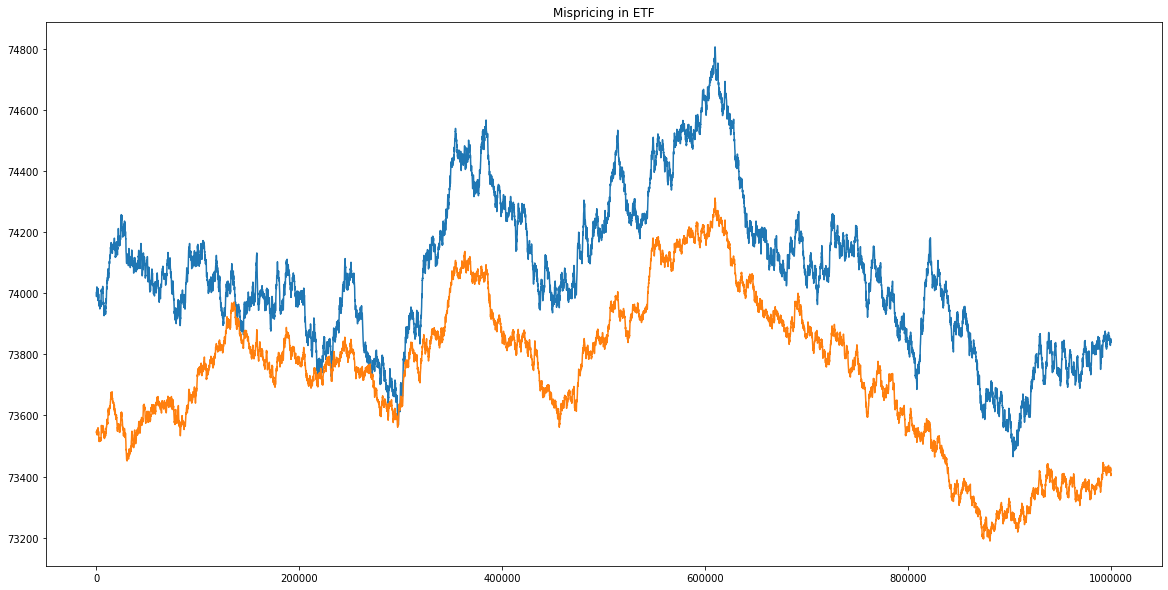

In [69]:
plt.figure(figsize = (20,10))
plt.ticklabel_format(style='plain', useOffset=False)
ETF = df_pivoted[["PICNIC_BASKET", "E(PICNIC_BASKET)"]]
plt.plot(ETF)
plt.title("Mispricing in ETF")

In [60]:
ETF["Misprice"] = ETF["PICNIC_BASKET"] - ETF["E(PICNIC_BASKET)"]
ETF["Misprice"].mean()

C:\Users\Csome\AppData\Local\Temp\ipykernel_12820\1173450902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ETF["Misprice"] = ETF["PICNIC_BASKET"] - ETF["E(PICNIC_BASKET)"]


325.27235

In [65]:
# Calculate the total bid volume and ask volume for each product
product_volumes = df.groupby("product").agg({
    "bid_volume_1": "sum", "bid_volume_2": "sum", "bid_volume_3": "sum",
    "ask_volume_1": "sum", "ask_volume_2": "sum", "ask_volume_3": "sum"
})

# Calculate the total volume for each product by summing the bid and ask volumes
product_volumes["total_volume"] = product_volumes.sum(axis=1)

filtered_df = product_volumes[product_volumes.index.isin(["BAGUETTE", "DIP", "UKULELE", "PICNIC_BASKET"])].reset_index()
filtered_df

,product,bid_volume_1,bid_volume_2,bid_volume_3,ask_volume_1,ask_volume_2,ask_volume_3,total_volume
0,BAGUETTE,731293.0,470451.0,0.0,731318.0,466283.0,3920.0,2403265.0
1,DIP,1687970.0,565289.0,0.0,1705362.0,542725.0,4988.0,4506334.0
2,PICNIC_BASKET,60463.0,169212.0,148166.0,61037.0,170131.0,148173.0,757182.0
3,UKULELE,497720.0,127935.0,0.0,498448.0,127098.0,0.0,1251201.0


Note particularly low volume of ETF 